# Creating Plot and manipulating data for MAS291

### import necessary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Access data from csv file

In [6]:
data = pd.read_csv('MAS291 Project.csv')
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1433.000000,1433.000000
mean,2008.890669,0.949596,0.642403,0.242625,0.223419,2.057744,76.661560,48.454735,7.568039,376.313329
std,3.901205,1.868641,1.337321,0.557823,0.526854,3.814037,11.087788,19.528056,1.093319,795.850503
min,1998.000000,0.010000,0.010000,0.010000,0.010000,0.040000,33.000000,20.000000,1.700000,4.000000
25%,2006.000000,0.180000,0.080000,0.020000,0.030000,0.470000,70.000000,32.000000,7.000000,47.000000
50%,2009.000000,0.430000,0.260000,0.070000,0.090000,1.025000,78.000000,45.000000,7.800000,110.000000
75%,2012.000000,1.010000,0.672500,0.210000,0.230000,2.205000,85.000000,61.250000,8.300000,319.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.540000,98.000000,113.000000,9.600000,10270.000000


## Pie chart for Genre

### Prepare data

In [3]:
sumed_Genre=data.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'],ascending=False).reset_index(drop=True)

top6=sumed_Genre.loc[7:]
plot_data=sumed_Genre.iloc[0:7].reset_index(drop=True)

plot_data.loc[len(plot_data)]={'Genre' : f'Remaining {len(top6)}', 'Global_Sales' : top6['Global_Sales'].sum()}


### Constructing plot

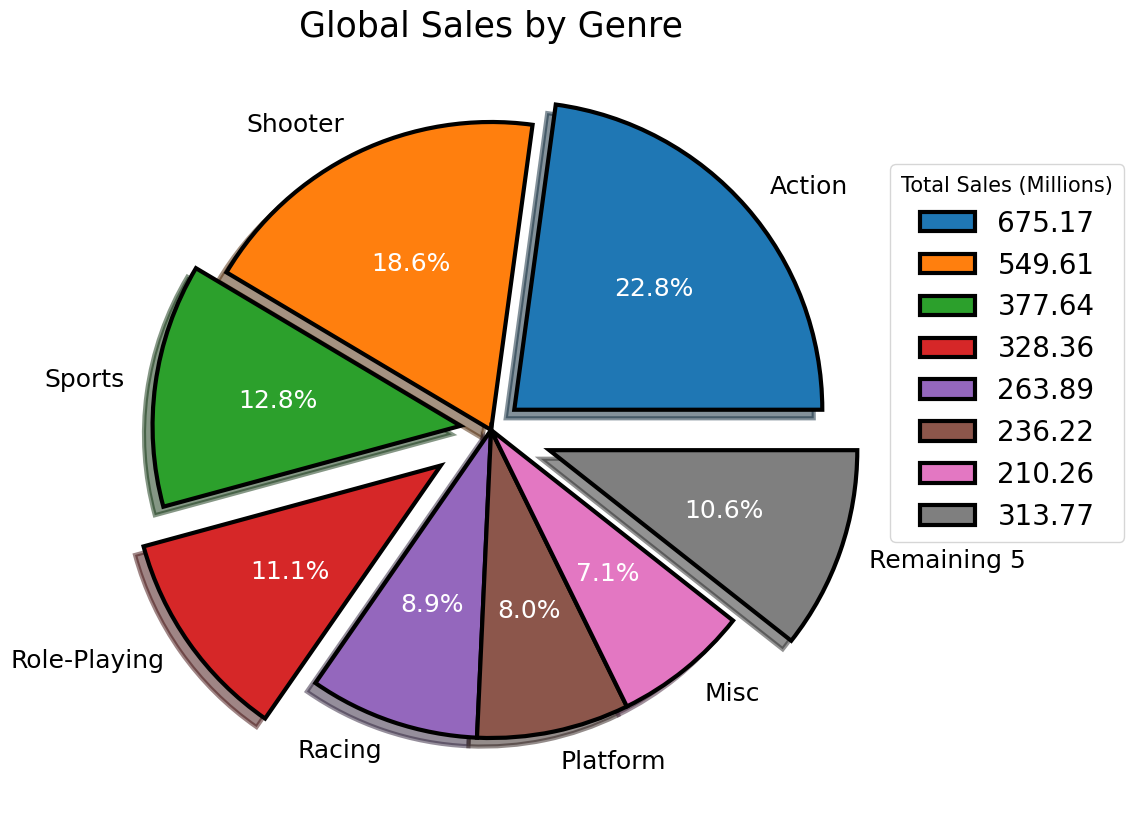

In [4]:
fig, ax = plt.subplots(figsize=(15,10))

explode = (0.1, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.2)


colors_dict= {'Action' : '#1f77b4',
         'Shooter':'#ff7f0e',
         'Sports':'#2ca02c',
         'Role-Playing':'#d62728',
         'Racing': '#9467bd',
         'Platform': '#8c564b',
         'Misc':'#e377c2',
         'Remaining 5':'#7f7f7f'}
colors = [colors_dict[genre] for genre in plot_data['Genre']]

wedges, texts, autotexts = ax.pie(plot_data['Global_Sales'], labels=plot_data['Genre'],
                                  shadow=True,  autopct='%1.1f%%',
                                  textprops={'fontsize': 18}, startangle=0,wedgeprops={'linewidth': 3, 'edgecolor': "black"},
                                  explode=explode,colors=colors)

for autotext in autotexts:
    autotext.set_color('white')

ax.set_title('Global Sales by Genre', fontsize=25)
ax.legend(wedges, plot_data['Global_Sales'],
          title='Total Sales (Millions)',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.4, 1.2),
          fontsize=20,
         title_fontsize=15)

plt.savefig('SalesByGenre.png', dpi=300, bbox_inches='tight')
plt.show()

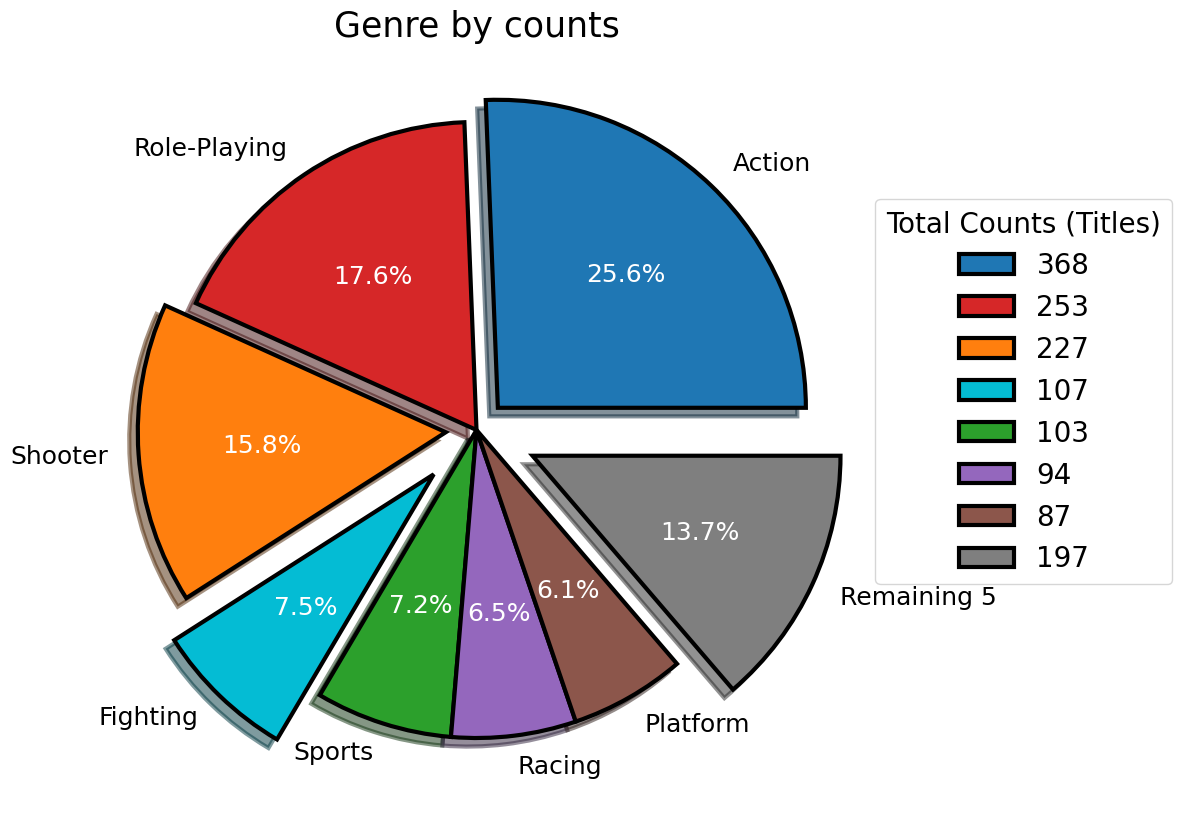

In [5]:
countOfGenre=data['Genre'].value_counts().reset_index()
countOfGenre

remaining=countOfGenre.loc[7:]
plot_count=countOfGenre.iloc[0:7].reset_index(drop=True)

plot_count.loc[len(plot_data)]={'Genre' : f'Remaining {len(remaining)}', 'count' : remaining['count'].sum()}
plot_count

explode = (0.1, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.2)
colors_dict2= {'Action' : '#1f77b4',
         'Shooter':'#ff7f0e',
         'Sports':'#2ca02c',
         'Role-Playing':'#d62728',
         'Racing': '#9467bd',
         'Platform': '#8c564b',
         'Fighting':'#04BCD4',
         'Remaining 5':'#7f7f7f'}
colors2 = [colors_dict2[genre] for genre in plot_count['Genre']]

fig2, ax2=plt.subplots(figsize=(10,10))

wedges, texts, autotexts = ax2.pie(plot_count['count'], labels=plot_count['Genre'],
                                  shadow=True,  autopct='%1.1f%%',
                                  textprops={'fontsize': 18},startangle=0,wedgeprops={'linewidth': 3, 'edgecolor': "black"},
                                  explode=explode,colors=colors2)

for autotext in autotexts:
    autotext.set_color('white')

ax2.set_title('Genre by counts', fontsize=25)
ax2.legend(wedges, plot_count['count'],
          title='Total Counts (Titles)',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1.1),
          fontsize=20,
          title_fontsize=20)

plt.savefig('GenreByCounts.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>